# Decison Trees and Random Forests

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [11]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "C:\\Users\\kevin\\Desktop\\Python_Lessons\\DataScience-Python3\\PastHires.csv"
df = pd.read_csv(input_file, header = 0)
df = pd.read_csv(input_file, header = 0, na_values = 'Na')

In [12]:
#df.head()
df.iloc[:5, :]
#or use df.head(5) to get the same results
#as the two lines of code above. 

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [13]:
df.info()
#check if there are any missing values. 
#there are no missing values in this pandas dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
Years Experience      13 non-null int64
Employed?             13 non-null object
Previous employers    13 non-null int64
Level of Education    13 non-null object
Top-tier school       13 non-null object
Interned              13 non-null object
Hired                 13 non-null object
dtypes: int64(2), object(5)
memory usage: 808.0+ bytes


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [14]:
d = {'Y': 0, 'N': 1}
#this dictionary is reversed from what I would normally do.
#normal is d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
#can use map function on a pandas dataframe.
#transform the pandas data frame using the dictionary.
####VERY IMPORTANT AND COOl
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

d_degree = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d_degree)

df.head()
#if I try to run this code again, missing values will be created.
#the map function can't find the keys in the dictionary
#since the values, which had the keys are now 0, 1, and 2. 

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,0,4,0,1,1,0
1,0,1,0,0,0,0,0
2,7,1,6,0,1,1,1
3,2,0,1,1,0,1,0
4,20,1,2,2,0,1,1


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [15]:
features = list(df.columns[:6])
#create a list of the first 6 columns. 
#call out the columns in the pandas dataframe. 
#this list will not include the response variable. 
features, df.index, df.shape
#don't need parentheses after shape and index
#attribute.

(['Years Experience',
  'Employed?',
  'Previous employers',
  'Level of Education',
  'Top-tier school',
  'Interned'],
 RangeIndex(start=0, stop=13, step=1),
 (13, 7))

Now actually construct the decision tree:

In [16]:
y = df["Hired"]
#response or classification we need. 
X = df[features]
#take the data from explanatory (features) variables
clf = tree.DecisionTreeClassifier()
#here is the classifier. 
clf = clf.fit(X,y)
#fit the classifier to the featured and response factors

... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

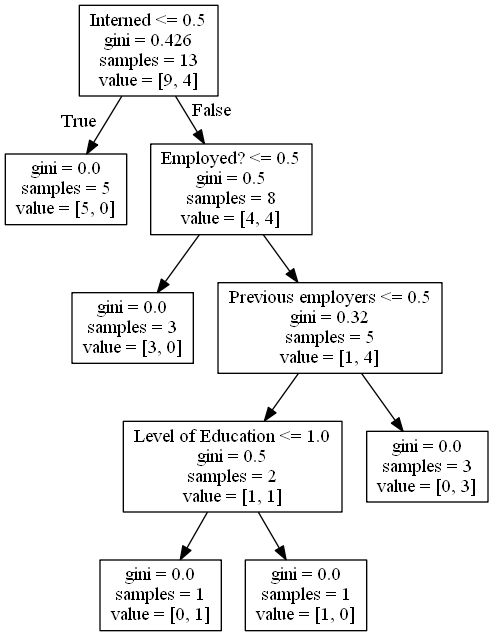

In [17]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
#create an export file with StringIO
#use dot_data in out_file statement. 
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#dot_data is related to a decision tree and must be used in the pydotplus
#attribute .graph_from_dot_data.
Image(graph.create_png())  

#if employed is one, go to the right of the tree.
#same with all the other parameters. 

#with this decision tree, interned is the first factor. 
#then we see if they are employed. If employed and interned is 1, go
#to the path on the right. 

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [48]:
from sklearn.ensemble import RandomForestClassifier
#import RandomForestClassifier from sklearn.ensemble.

clf = RandomForestClassifier(n_estimators=50)
#create a randomforestclassifier to create 50 trees. 
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]])) #must be same n of columns
#as the dataframe.

#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

print (clf.predict([[0, 0, 0, 4, 0, 1]])) #this should be doing what it is doing now. 
#you do not get the same results every time. 
#usually, the unemployed person will not be hired. 

[0]
[0]
[0]


## Activity

Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.